<div align='center'>
    <h1>Jurnal Praktikum Dasar Kecerdasan Artifisial</h1>
    <h3>Modul 8: Implementasi Hill Climbing dan Simulated Annealing</h3>
</div>

### Tujuan Praktikum
- Mahasiswa memahami dan mampu mengimplementasikan algoritma Hill Climbing pada python
- Mahasiswa memahami dan mampu mengimplementasikan algoritma Simulated Annealing pada python

**Jangan lupa untuk selalu import *library* Random ketika memulai sesi baru (*run time*) atau kode Python yang memerlukan penggunaan library Random** 

In [41]:
# import random
import random # library ini akan digunakan untuk melakukan inisiasi solusi awal secara random
import pandas as pd

def printJadwal(solusi): 
    print(pd.DataFrame.from_dict(solusi, orient='index', columns=['Ruangan', 'Waktu']))

## Hill Climbing

### Soal 1

SMA RezaSangar memiliki 9 mata pelajaran yang harus dijadwalkan untuk satu semester. Terdapat 3 ruang kelas yang tersedia dan setiap mata pelajaran harus dijadwalkan pada salah satu dari 4 waktu yang tersedia dalam seminggu. 

**Syarat:**
- Tidak boleh ada dua mata pelajaran yang dijadwalkan pada waktu yang sama.
- Setiap mata pelajaran harus dijadwalkan tepat pada satu waktu dan satu ruang

**Final State:**
- Seluruh mata pelajaran telah dijadwalkan ke dalam ruangan dan waktu yang tersedia tanpa adanya bentrok

**Data mata pelajaran, ruang kelas, dan waktu yang tersedia**
|Mata Pelajaran|Ruang Kelas|Waktu|
|---|---|---|
|Ekonomi|Ruang 101|Senin 08:00|
|Geologi|Ruang 102|Senin 10:00|
|Sejarah|Ruang 103|Selasa 08:00|
|Fisika||Rabu 08:00|
|Biologi|||
|Kimia|||
|Matematika|||
|Bahasa Indonesia|||
|Bahasa Inggris|||

#### 1. Buat fungsi untuk mencari solusi awal (Bobot nilai: `15`)

Hint: Solusi yang akan terbentuk adalah sebuah dictionary dengan `key berupa nama mata pelajaran` dan `value berupa tupple` ruang kelas dan waktu yang tersedia

**Pro tips:** gunakan fungsi `random.choice()` untuk memilih secara acak nilai dalam array 

In [42]:
def initiateSolusiAwal(mapel, ruangan, waktu):
    solusi = {}  # Buat sebuah dictionary kosong
    for mk in mapel:  # Telusuri seluruh nilai dalam array mapel!
        # Key akan berupa nama mapel dan valuenya berupa tupple ruang kelas dan waktu yang tersedia
        solusi[mk] = (random.choice(ruangan), random.choice(waktu)) 
    return solusi

#### 2. Buat fungsi untuk menghitung jumlah jadwal yang bentrok (Bobot nilai: `10`)

**Pro tips:** kita dapat melakukan eksplorasi nilai dictionary dengan menggunakan loop berikut `for key, value in dict.items():`

In [43]:
def hitungBentrok(solusi):
    jumlahBentrok = 0  # inisiasi nilai awal jumlah jadwal yang bentrok dengan nilai 0
    jadwal = {}  # buat dictionary kosong untuk menampung jadwal

    for mataKuliah, (ruangan, waktu) in solusi.items():  # Telusuri seluruh nilai dalam dictionary solusi
        key = (ruangan, waktu)  # Tampung tupple yang ada pada dictionary
        if key in jadwal:  # Cek apakah tupple ruangan dan waktu sudah ada di jadwal atau belum
            jumlahBentrok += 1  # Lakukan increment jumlah bentrok
        else:
            jadwal[key] = mataKuliah  # isi key jadwal dengan tupple ruang dan waktu, dan value jadwal dengan nama mata pelajaran
    
    return jumlahBentrok


#### 3. Buat fungsi untuk mencari tetangga (Bobot nilai: `20`)

In [44]:
def cariTetangga(solusi, arrMapel, arrRuangan, arrWaktu):
    tetangga = []  # inisiasi tetangga dengan list kosong
    for pelajaran in arrMapel:  # eksplorasi seluruh pelajaran pada list arrMapel
        currRuangan, currWaktu = solusi[pelajaran]  # ambil nilai ruangan dan waktu saat ini pada dictionary solusi

        # coba untuk ganti ruangan
        for ruangan in arrRuangan:  # eksplorasi seluruh ruangan pada list arrRuangan
            if ruangan != currRuangan:  # buat percabangan jika ruangan tidak sama dengan currRuangan
                tetanggaBaru = solusi.copy()
                tetanggaBaru[pelajaran] = (ruangan, currWaktu)  # buat tetangga baru berdasarkan ruangan baru yang telah ditemukan dan currentWaktu
                tetangga.append(tetanggaBaru)  # tambah tetanggaBaru ke dalam list tetangga

        # coba untuk ganti waktu:
        for waktu in arrWaktu:  # eksplorasi seluruh waktu pada list arrWaktu
            if waktu != currWaktu:  # buat percabangan jika waktu tidak sama dengan currWaktu
                tetanggaBaru = solusi.copy()
                tetanggaBaru[pelajaran] = (currRuangan, waktu)  # buat tetangga baru berdasarkan waktu baru yang telah ditemukan dan currentRuangan
                tetangga.append(tetanggaBaru)  # tambah tetanggaBaru ke dalam list tetangga

    return tetangga

#### 4. Mencari solusi dengan hill climbing (Bobot nilai: `25`)

a. definisikan data berdasarkan soal yang berikan

In [45]:
mataPelajaran = ['Ekonomi', 'Geologi', 'Sejarah', 'Fisika', 'Biologi', 'Kimia', 'Matematika', 'Bahasa Indonesia', 'Bahasa Inggris'] 
ruangKelas = ['Ruang 101', 'Ruang 102', 'Ruang 103'] 
waktu = ['Senin 08:00', 'Senin 10:00', 'Selasa 08:00', 'Rabu 08:00'] 

b. Buat solusi awal dan hitung berapa banyak jadwal yang bentrok

In [46]:
solusi = initiateSolusiAwal(mataPelajaran, ruangKelas, waktu) # deklarasikan solusi awal dengan menggunakan fungsi initiateSolusiAwal()
jumBentrok = hitungBentrok(solusi) # Hitung jumlah jadwal bentrok dengan fungsi hitungBentrok()
iterasi = 0 

print(f"Iterasi: {iterasi}\nJumlah Bentrok: {jumBentrok}\nSolusi Awal:")
printJadwal(solusi)

Iterasi: 0
Jumlah Bentrok: 3
Solusi Awal:
                    Ruangan         Waktu
Ekonomi           Ruang 102  Selasa 08:00
Geologi           Ruang 103  Selasa 08:00
Sejarah           Ruang 103    Rabu 08:00
Fisika            Ruang 101    Rabu 08:00
Biologi           Ruang 101    Rabu 08:00
Kimia             Ruang 102  Selasa 08:00
Matematika        Ruang 103    Rabu 08:00
Bahasa Indonesia  Ruang 102   Senin 08:00
Bahasa Inggris    Ruang 102    Rabu 08:00


**Output mungkin akan memberikan hasil yang berbeda karena dipilih secara acak**

c. Lakukan looping hingga jadwal bentrok habis atau tidak ada jumlah jadwal bentrok yang lebih baik daripada solusi saat ini

In [47]:
while True:
    tetangga = cariTetangga(solusi, mataPelajaran, ruangKelas, waktu)  # cari tetangga solusi dengan menggunakan fungsi cariTetangga()

    jumlahBentrokTetangga = []  # inisiasi list kosong
    for solusiTetangga in tetangga:  # telusuri seluruh kemungkinan tetangga yang sudah didapatkan
        bentrokTetangga = hitungBentrok(solusiTetangga)  # hitung jadwal bentrok tetangga dengan fungsi hitungBentrok()
        jumlahBentrokTetangga.append((solusiTetangga, bentrokTetangga))  # tambahkan tuple solusi dan jumlah bentrok ke dalam list jumlahBentrokTetangga
    
    jumlahBentrokTetangga.sort(key=lambda x: x[1])  # melakukan sorting array berdasarkan nilai bentrok 
    bestTetangga, bestBentrok = jumlahBentrokTetangga[0]  # mengambil solusi dan jumlah bentrok terbaik

    if bestBentrok < jumBentrok:  # buat pengkondisian apabila jumlah bentrok tetangga lebih kecil dari nilai jumlah bentrok saat ini
        solusi = bestTetangga  # Assign nilai solusi menjadi solusi terbaik saat ini
        jumBentrok = bestBentrok  # Assign nilai jumBentrok menjadi jumlah bentrok paling sedikit saat ini
        iterasi += 1  # increment iterasi
        print(f"\nIterasi: {iterasi}\nJumlah Bentrok: {jumBentrok}\nSolusi:")
        printJadwal(solusi)
        print("-" * 50)
        if jumBentrok == 0:  # percabangan jika jumlah bentrok sudah 0
            print("Solusi terbaik ditemukan")
            break
    else:
        print("Tidak ada tetangga yang lebih baik. Algoritma berhenti.")
        break

print("\nSolusi terbaik: ")
printJadwal(solusi)
print("Jumlah jadwal bentrok: ", jumBentrok)


Iterasi: 1
Jumlah Bentrok: 2
Solusi:
                    Ruangan         Waktu
Ekonomi           Ruang 101  Selasa 08:00
Geologi           Ruang 103  Selasa 08:00
Sejarah           Ruang 103    Rabu 08:00
Fisika            Ruang 101    Rabu 08:00
Biologi           Ruang 101    Rabu 08:00
Kimia             Ruang 102  Selasa 08:00
Matematika        Ruang 103    Rabu 08:00
Bahasa Indonesia  Ruang 102   Senin 08:00
Bahasa Inggris    Ruang 102    Rabu 08:00
--------------------------------------------------

Iterasi: 2
Jumlah Bentrok: 1
Solusi:
                    Ruangan         Waktu
Ekonomi           Ruang 101  Selasa 08:00
Geologi           Ruang 103  Selasa 08:00
Sejarah           Ruang 103   Senin 08:00
Fisika            Ruang 101    Rabu 08:00
Biologi           Ruang 101    Rabu 08:00
Kimia             Ruang 102  Selasa 08:00
Matematika        Ruang 103    Rabu 08:00
Bahasa Indonesia  Ruang 102   Senin 08:00
Bahasa Inggris    Ruang 102    Rabu 08:00
---------------------------------

### Soal 2 (Bobot nilai `30`)

SMA RezaHaHaHa memiliki 9 mata pelajaran yang harus dijadwalkan untuk satu semester. Terdapat 3 ruang kelas yang tersedia dan setiap mata pelajaran harus dijadwalkan pada salah satu dari 4 waktu yang tersedia dalam seminggu. 

**Syarat:**
- Tidak boleh ada dua mata pelajaran yang dijadwalkan pada waktu yang sama.
- Setiap mata pelajaran harus dijadwalkan tepat pada satu waktu dan satu ruang
- ada beberapa mata pelajaran yang harus `diambil terlebih dahulu` sebelum mata pelajaran tertentu

**Final State:**
- Seluruh mata pelajaran telah dijadwalkan ke dalam ruangan dan waktu yang tersedia tanpa adanya bentrok dan sudah sesuai dengan syarat pengambilan mata pelajaran

**Data mata pelajaran, ruang kelas, dan waktu yang tersedia**
|Mata Pelajaran|Ruang Kelas|Waktu|
|---|---|---|
|Logika Matematika|Ruang 101|Senin 08:00|
|Matematika Diskrit|Ruang 102|Senin 10:00|
|Kalkulus|Ruang 103|Selasa 08:00|
|Kalkulus Lanjut||Rabu 08:00|
|Agama|||
|Pendidikan Karakter|||
|Biologi|||
|Kimia|||
|Fisika|||

**Syarat tambahan**
- Mata pelajaran `Kalkulus Lanjut` harus diambil setelah mata pelajaran `Kalkulus`
- Mata pelajaran `Matematika Diskrit` harus diambil setelah mata pelajaran `Logika Matematika`

Pro tips: ketiga fungsi sebelumnya, namun `buat ulang fungsi hitungBentrok` dan tambahkan algoritma untuk memeriksa urutan mata pelajaran

In [48]:
# Buat ulang hitungBentrok, ketika urutan_mata_pelajaran salah maka bentrok akan di increment
def hitungBentrok(solusi, urutan_mata_pelajaran):
    jumlahBentrok = 0  # Inisiasi jumlah bentrok
    jadwal = {}  # Dictionary untuk menyimpan jadwal

    # Periksa bentrok berdasarkan ruangan dan waktu
    for mataKuliah, (ruangan, waktu) in solusi.items():
        key = (ruangan, waktu)  # Kombinasi ruangan dan waktu
        if key in jadwal:  # Jika sudah ada jadwal di ruangan dan waktu yang sama
            jumlahBentrok += 1  # Tambahkan jumlah bentrok
        else:
            jadwal[key] = mataKuliah  # Simpan jadwal

    # Periksa bentrok berdasarkan urutan mata pelajaran
    for i in range(len(urutan_mata_pelajaran) - 1):
        mataPelajaranSebelum = urutan_mata_pelajaran[i]
        mataPelajaranSesudah = urutan_mata_pelajaran[i + 1]

        # Pastikan kedua mata pelajaran ada dalam solusi
        if mataPelajaranSebelum in solusi and mataPelajaranSesudah in solusi:
            waktuSebelum = solusi[mataPelajaranSebelum][1]
            waktuSesudah = solusi[mataPelajaranSesudah][1]

            # Jika waktu mata pelajaran sebelum lebih lambat atau sama dengan waktu sesudah
            if waktu.index(waktuSebelum) >= waktu.index(waktuSesudah):
                jumlahBentrok += 1  # Tambahkan jumlah bentrok

    return jumlahBentrok

In [49]:
# Inisiasi data
urutan_mata_pelajaran = ['Logika Matematika', 'Matematika Diskrit', 'Kalkulus', 'Kalkulus Lanjut', 'Agama', 'Pendidikan Karakter', 'Biologi', 'Kimia', 'Fisika']
mataPelajaran = ['Logika Matematika', 'Matematika Diskrit', 'Kalkulus', 'Kalkulus Lanjut', 'Agama', 'Pendidikan Karakter', 'Biologi', 'Kimia', 'Fisika']
ruangKelas = ['Ruang 101', 'Ruang 102', 'Ruang 103']
waktu = ['Senin 08:00', 'Senin 10:00', 'Selasa 08:00', 'Rabu 08:00']

def hitungBentrok(solusi, urutan_mata_pelajaran):
    jumlahBentrok = 0  # Inisiasi jumlah bentrok
    jadwal = {}  # Dictionary untuk menyimpan jadwal

    # Periksa bentrok berdasarkan ruangan dan waktu
    for mataKuliah, (ruangan, waktu) in solusi.items():
        key = (ruangan, waktu)  # Kombinasi ruangan dan waktu
        if key in jadwal:  # Jika sudah ada jadwal di ruangan dan waktu yang sama
            jumlahBentrok += 1  # Tambahkan jumlah bentrok
        else:
            jadwal[key] = mataKuliah  # Simpan jadwal

    # Periksa bentrok berdasarkan urutan mata pelajaran
    for i in range(len(urutan_mata_pelajaran) - 1):
        mataPelajaranSebelum = urutan_mata_pelajaran[i]
        mataPelajaranSesudah = urutan_mata_pelajaran[i + 1]

        # Pastikan kedua mata pelajaran ada dalam solusi
        if mataPelajaranSebelum in solusi and mataPelajaranSesudah in solusi:
            waktuSebelum = solusi[mataPelajaranSebelum][1]
            waktuSesudah = solusi[mataPelajaranSesudah][1]

            # Pastikan waktuSebelum dan waktuSesudah ada dalam list waktu
            if waktuSebelum in waktu and waktuSesudah in waktu:
                # Jika waktu mata pelajaran sebelum lebih lambat atau sama dengan waktu sesudah
                if waktu.index(waktuSebelum) >= waktu.index(waktuSesudah):
                    jumlahBentrok += 1  # Tambahkan jumlah bentrok
            else:
                # Jika waktu tidak valid, tambahkan jumlah bentrok
                jumlahBentrok += 1

    return jumlahBentrok


In [50]:
# Buat dan tampilkan solusi pertama
solusiPertama = initiateSolusiAwal(mataPelajaran, ruangKelas, waktu)
print("Solusi Pertama:")
printJadwal(solusiPertama)


Solusi Pertama:
                       Ruangan         Waktu
Logika Matematika    Ruang 102    Rabu 08:00
Matematika Diskrit   Ruang 102  Selasa 08:00
Kalkulus             Ruang 102   Senin 10:00
Kalkulus Lanjut      Ruang 103   Senin 08:00
Agama                Ruang 101   Senin 08:00
Pendidikan Karakter  Ruang 102   Senin 10:00
Biologi              Ruang 103  Selasa 08:00
Kimia                Ruang 103    Rabu 08:00
Fisika               Ruang 102   Senin 10:00


In [51]:
# Loop dengan mempertimbangkan jadwal bentrok dan urutan jadwal
for solusiTetangga in tetangga:
    bentrokTetangga = hitungBentrok(solusiTetangga, urutan_mata_pelajaran)
    jumlahBentrokTetangga.append((solusiTetangga, bentrokTetangga))

jumlahBentrokTetangga.sort(key=lambda x: x[1])
bestTetangga, bestBentrok = jumlahBentrokTetangga[0]

if bestBentrok < jumBentrok:
    solusi = bestTetangga
    jumBentrok = bestBentrok
    iterasi += 1
    print(f"\nIterasi: {iterasi}\nJumlah Bentrok: {jumBentrok}\nSolusi:")
    printJadwal(solusi)
    print("-" * 50)
else:
    print("Tidak ada tetangga yang lebih baik. Algoritma berhenti.")


Tidak ada tetangga yang lebih baik. Algoritma berhenti.


## Simulated Annealing


**Jangan lupa untuk selalu import *library* ketika memulai sesi baru (*run time*) atau kode Python yang memerlukan penggunaan library** 

In [52]:
import random
import math
import numpy as np 
import matplotlib.pyplot as plt

### Soal Cerita

Ekspedisi SiReza memiliki 1 kantor pusat dan beberapa lokasi pelanggan yang harus dikunjungi untuk pengiriman barang. Setiap pelanggan memiliki permintaan barang yang berbeda, dan setiap kendaraan memiliki kapasitas maksimum yang dapat diangkut.

**Tujuan:**
- Semua pelanggan berhasil dilayani
- Total jarak tempuh kendaraan atau biaya operasional dapat diminimalkan
- Kapasitas kendaraan tidak terlampaui

**Data Perusahaan Ekspedisi:**
- Kantor pusat berada di koordinat `(50,50)`
- Jumlah kendaraan yang bisa digunakan adalah `3`
- Kapasitas tiap kendaraan adalah `100`

**Data Pelanggan:**
|ID Pelanggan|Koordinat X|Koordinat Y|Kapasitas yang dibutuhkan|
|---|---|---|---|
|Cust-1001|10|20|10|
|Cust-1002|15|25|15|
|Cust-1003|20|30|20|
|Cust-1004|35|35|25|
|Cust-1005|40|40|30|
|Cust-1006|45|45|35|
|Cust-1007|50|55|40|
|Cust-1008|55|60|45|
|Cust-1009|60|65|50|
|Cust-1010|65|70|55|

**Penting! :**

**`Hint:`**
Banyak function yang menggunakan parameter dengan nama yang sama seperti 
- arrCust merupakan array customer yang memiliki data berbentuk list yang berisi banyak tupple, berikut contoh dari datanya:

        arrCust = [
            (customerID, X, Y, Kapasitas),
            (customerID, X, Y, Kapasitas)
        ]

- routes akan berisi rute yang dilewati oleh ketiga kendaraan data tersebut akan berupa list yang memiliki 3 list didalamnya, berikut contoh dari datanya:

        routes = [
            [customerID, customerID, customerID],
            [customerID, customerID],
            [customerID, customerID, customerID, customerID]
        ]

#### 1. Buat fungsi untuk menghitung jarak euclidean (Bobot nilai: `5`)

Jarak Euclidean antara dua titik, (x₁, y₁) dan (x₂, y₂), dihitung dengan rumus berikut:

```math
d(x₁, y₁, x₂, y₂) = \sqrt{(x₂ - x₁)^2 + (y₂ - y₁)^2}
````

Pro tips: gunakan `math.sqrt()` untuk menghitung akar.

In [53]:
# Input berupa 2 tupple koordinat
def jarakEuclidean(a, b):
    return math.sqrt((b[0] - a[0])**2 + (b[1] - a[1])**2)  # hitung dengan menggunakan rumus jarak euclidean

#### 2. Buat fungsi untuk mencari customer berdasarkan customer id (Bobot nilai: `5`)

In [54]:
def cariPelanggan(customerID, arrCust):
    for cust in arrCust:  # Telusuri seluruh customer dalam list customers
        if cust[0] == customerID:  # Periksa apakah index pertama cust sama dengan customer id
            return cust  # Kembalikan nilai dari cust
    return None  # Kembalikan None jika tidak ditemukan pelanggan

#### 3. Buat fungsi untuk menghitung jarak keseluruhan dalam list routes (Bobot nilai: `10`)

In [55]:
def totalJarak(routes, pusat, arrCust):
    distance = 0  # Set jarak awal
    for route in routes:  # Telusuri seluruh rute pada routes
        if len(route) == 0:  # Buat percabangan jika tidak ada pelanggan pada route
            continue  # Skip iterasi ini ke iterasi selanjutnya
        
        # Mulai dari pusat
        prev = pusat  # Inisiasi prev dengan koordinat kantor pusat
        for customerID in route:  # Telusuri seluruh customer dalam route
            customer = cariPelanggan(customerID, arrCust)  # Cari customer berdasarkan customerID dalam array customer
            if customer is None:  # Jika customer tidak ditemukan
                continue  # Skip iterasi ini ke iterasi selanjutnya
            current = (customer[1], customer[2])  # Deklarasi lokasi saat ini berdasarkan koordinat customer yang telah ditemukan
            distance += jarakEuclidean(prev, current)  # Hitung jarak dari lokasi sebelumnya ke lokasi saat ini
            prev = current  # Perbarui lokasi prev dengan lokasi saat ini
        distance += jarakEuclidean(prev, pusat)  # Hitung jarak kendaraan untuk kembali ke kantor pusat
    return distance


#### 4. Buat fungsi untuk melakukan validasi kapasitas pada list routes (Bobot nilai: `10`) 

In [56]:
def validateRoute(routes, arrCust, kapasitasMax):
    for route in routes:  # Telusuri seluruh route pada routes
        total = 0  # Inisiasi kapasitas
        for customerID in route:  # Telusuri seluruh customer dalam route
            customer = cariPelanggan(customerID, arrCust)  # Cari customer berdasarkan customerID dalam array customer
            if customer is not None:  # Buat percabangan jika customer ditemukan atau tidak None
                total += customer[3]  # Jumlahkan kapasitas yang dibutuhkan customer
        if total > kapasitasMax:  # Cek apakah total sudah melebihi kapasitas maksimum atau belum
            return False  # Apabila total sudah melebihi kapasitas maksimum maka validate akan mengembalikan nilai False
    return True  # Kembalikan nilai boolean True jika semua rute valid

#### 5. Buat fungsi untuk melakukan inisiasi solusi awal (Bobot nilai: `15`)

In [57]:
def inisiasiSolusiAwal(jumlahKendaraan, arrCust, kapasitasMaksimum):
    routes = [[] for _ in range(jumlahKendaraan)]  # Buat list kosong untuk setiap kendaraan
    shuffleCust = [cust[0] for cust in arrCust]  # Ambil customer ID dari arrCust
    random.shuffle(shuffleCust)  # Acak urutan customer ID

    for customerID in shuffleCust:  # Telusuri seluruh customer ID yang telah diacak
        customer = cariPelanggan(customerID, arrCust)  # Cari data customer berdasarkan ID
        placed = False  # Inisiasi bahwa customer belum ditempatkan
        for route in routes:  # Telusuri seluruh rute kendaraan
            total = sum(cariPelanggan(cid, arrCust)[3] for cid in route)  # Hitung total kapasitas pada rute
            if total + customer[3] <= kapasitasMaksimum:  # Periksa apakah kapasitas masih mencukupi
                route.append(customerID)  # Tambahkan customer ID ke rute
                placed = True  # Tandai bahwa customer telah ditempatkan
                break  # Keluar dari loop rute
        if not placed:  # Jika customer belum ditempatkan
            routes[0].append(customerID)  # Tambahkan customer ke rute pertama sebagai fallback
    return routes


#### 6. Buat fungsi untuk mencari tetangga (Bobot nilai: `15`)

In [58]:
def cariTetangga(routes, arrCust, kapasitasMax):
    # Salin rute saat ini
    new_routes = [route.copy() for route in routes]  # inisiasi rute baru dengan salinan dari rute saat ini
    
    # ambil 2 route secara random yang akan kita coba tukar customernya dengan menggunakan random.sample()
    route1, route2 = random.sample(range(len(new_routes)), 2)
    if len(new_routes[route1]) == 0 or len(new_routes[route2]) == 0:  # periksa apakah kedua route memiliki rute atau tidak
        return new_routes  # jika kendaraan tidak memiliki rute maka tidak ada yang ditukar, fungsi akan langsung mengembalikan nilai rute yang sama
    
    # Pilih dua pelanggan secara acak dari rute yang berbeda dengan menggunakan fungsi random.choice()
    customer1 = random.choice(new_routes[route1])
    customer2 = random.choice(new_routes[route2])
    
    # Tukar pelanggan customer1 pada route1 dipindahkan ke route2 dan sebaliknya
    new_routes[route1].remove(customer1)
    new_routes[route2].remove(customer2)
    new_routes[route1].append(customer2)
    new_routes[route2].append(customer1)
    
    if validateRoute(new_routes, arrCust, kapasitasMax):  # validasi apakah rute tidak melebihi kapasitas maksimum 
        return new_routes
    else:
        return routes


#### 7. Buat algoritma Simulated Annealing (Bobot nilai: `20`)

In [59]:
def simulated_annealing(jumlahKendaraan, arrCust, kapasitasMaksimum, pusat):
    # Inisiasi nilai awal dan jarak awal
    currentSolution = inisiasiSolusiAwal(jumlahKendaraan, arrCust, kapasitasMaksimum)
    currentCost = totalJarak(currentSolution, pusat, arrCust)
    
    # Tentukan best solution dan best Cost saat ini
    bestSolution = currentSolution
    bestCost = currentCost
    
    T = 1000  # Temperatur awal
    T_min = 1
    alpha = 0.95  # Faktor pendinginan
    
    while T > T_min:
        for _ in range(100):
            newSolution = cariTetangga(currentSolution, arrCust, kapasitasMaksimum)  # cari solusi baru dengan menggunakan fungsi cariTetangga()
            newCost = totalJarak(newSolution, pusat, arrCust)  # hitung total jarak solusi baru
            
            delta = newCost - currentCost  # selisih cost baru dengan cost lama
            if delta < 0 or random.uniform(0, 1) < math.exp(-delta / T):  # Jika memenuhi kondisi ini maka current solusi akan kita update
                currentSolution = newSolution
                currentCost = newCost
                
                if newCost < bestCost:  # Tentukan apakah cost baru merupakan cost terkecil
                    # Update best solution dan best cost
                    bestSolution = newSolution
                    bestCost = newCost
        T *= alpha  # temperature akan turun bergantung pada alpha
    return bestSolution, bestCost


#### 8. Buat main untuk mencari solusi terbaik dengan menggunakan fungsi yang telah dibangun (Bobot nilai: `20`)

a. inisiasi data berdasarkan soal cerita diatas

In [60]:
# Koordinat kantor pusat
kantorPusat = (50, 50)

# Data Pelanggan adalah list berisi tupple seperti tupple berikut (ID, X, Y, Permintaan)
arrCust = [
    ('Cust-1001', 10, 20, 10),
    ('Cust-1002', 15, 25, 15),
    ('Cust-1003', 20, 30, 20),
    ('Cust-1004', 35, 35, 25),
    ('Cust-1005', 40, 40, 30),
    ('Cust-1006', 45, 45, 35),
    ('Cust-1007', 50, 55, 40),
    ('Cust-1008', 55, 60, 45),
    ('Cust-1009', 60, 65, 50),
    ('Cust-1010', 65, 70, 55)
]

# jumlah kendaraan
jumlahKendaraan = 3

# kapasitas maksimum kendaraan
kapasitasMaksimum = 100


b. cari solusi terbaik dan tampilkan solusi tersebut

In [61]:
# Panggil fungsi simulated_annealing untuk mencari best routes dan best distance
bestRoutes, bestDistance = simulated_annealing(jumlahKendaraan, arrCust, kapasitasMaksimum, kantorPusat)

# Print rute terbaik
print("Rute Terbaik:")
for i, route in enumerate(bestRoutes):
    print(f"Kendaraan {i+1}: kantor pusat -> ", end="")
    for customerID in route:
        print(customerID, end=" -> ")
    print("kantor pusat")

# Print jarak rute terbaik
print("\nJarak Rute Terbaik: ", bestDistance)


Rute Terbaik:
Kendaraan 1: kantor pusat -> Cust-1005 -> Cust-1008 -> Cust-1003 -> Cust-1002 -> Cust-1004 -> kantor pusat
Kendaraan 2: kantor pusat -> Cust-1010 -> Cust-1006 -> Cust-1001 -> kantor pusat
Kendaraan 3: kantor pusat -> Cust-1007 -> Cust-1009 -> kantor pusat

Jarak Rute Terbaik:  323.0819484560834


|input|output|
|---|---|
||Rute Terbaik:| 
||Kendaraan 1: kantor pusat -> Cust-1009 -> Cust-1005 -> Cust-1001 -> Cust-1007 -> kantor pusat|
||Kendaraan 2: kantor pusat -> Cust-1010 -> Cust-1004 -> Cust-1002 -> kantor pusat| 
||Kendaraan 3: kantor pusat -> Cust-1006 -> Cust-1008 -> Cust-1003 -> kantor pusat|
||Jarak Rute Terbaik:  392.6104322407335|

c. Visualisasikan rute yang akan dilalui tiap kendaraan

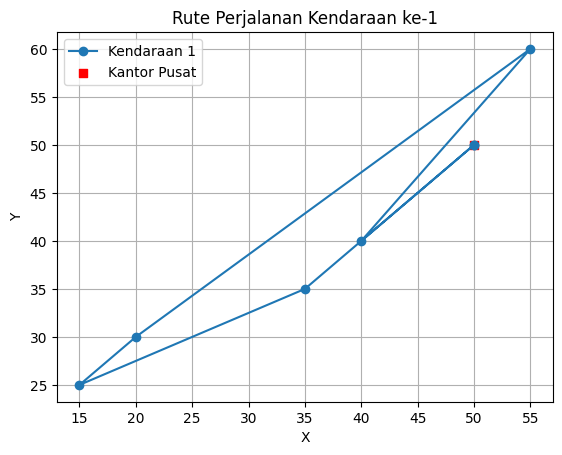

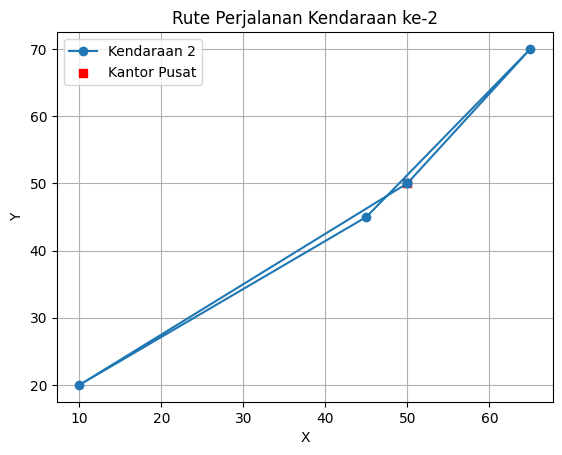

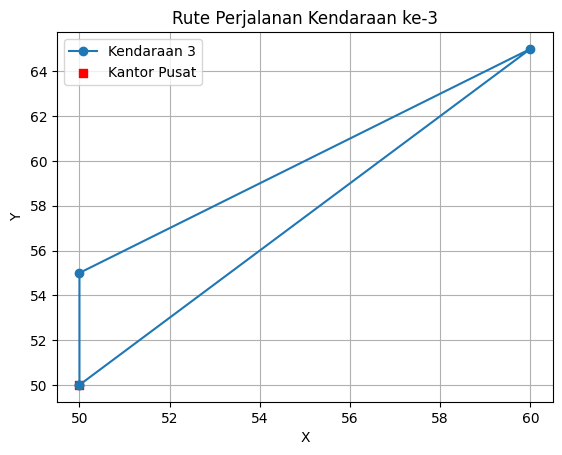

In [62]:
# buat list berisi 3 list yang akan menampung rute ketiga kendaraan
route_coords = [[], [], []] 

# lakukan loop sebanyak kendaraan yang perusahaan miliki
for i in range(jumlahKendaraan):
    # kendaraan berasal dari kantor pusat dan akan kembali ke kantor pusat maka masukkan koordinat kantor pusat
    route_coords[i].append(kantorPusat) 
    for cust in bestRoutes[i]:
        customer = cariPelanggan(cust, arrCust)
        coor = (customer[1], customer[2])
        route_coords[i].append(coor)
    
    # kendaraan berasal dari kantor pusat dan akan kembali ke kantor pusat maka masukkan koordinat kantor pusat
    route_coords[i].append(kantorPusat)

# lakukan enumerate untuk semua koordinat rute kendaraan
for i, route in enumerate(route_coords):
    # buat figure baru untuk setiap rute kendaraan
    plt.figure()  
    
    # lakukan transpos rute dengan zip()
    x, y = zip(*route)
    
    # buat plot untuk koordinat rutenya
    plt.plot(x, y, marker='o', label=f'Kendaraan {i+1}')

    # tandai kantor pusat
    plt.scatter(kantorPusat[0], kantorPusat[1], c='red', marker='s', label='Kantor Pusat')

    plt.title(f'Rute Perjalanan Kendaraan ke-{i+1}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()


contoh *output*

**rute kendaraan 1**

<img src="./asset/Kendaraan_1.png" alt="Rute Kendaraan 1" style="width: 50%; height: auto;">

**rute kendaraan 2**

<img src="./asset/Kendaraan_2.png" alt="Rute Kendaraan 2" style="width: 50%; height: auto;">

**rute kendaraan 3**

<img src="./asset/Kendaraan_3.png" alt="Rute Kendaraan 3" style="width: 50%; height: auto;">
